In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**<h3> List of Indicators used</h3>**

**<h4> Poverty </h4>**

1. Gini Index

2. Poverty PCA first component - Represents average of all poverty indicators
    
3. Poverty PCA second component - Represents Severity of poverty

**<h4> Health </h4>**

4. Life Expectancy
5. Number of physicians per 1000 people
6. Number of hospital beds per 1000 people 
7. Cause of death (% of total) by injury

**<h4>Education</h4>**

8. Percentage of population ages 25+ who have completed the following
    * Short-cycle tertiary
    * lower secondary
    * Atleast Master's or equivalent
    * Atleast Doctoral or equivalent

**<h4>Economy</h4>**

9. GDP (current USD)

10. Unemployment

11. Inflation, consumer prices (annual %)

12. Population, total

In [2]:
df = pd.read_csv('../data/interim/selected_features.csv',index_col=[0])

df.head()

,Country Name,Year,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Inflation, consumer prices (annual %)",Gini index,GDP (current US$),"Cause of death, by injury (% of total)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Population, total","Unemployment, total (% of total labor force) (modeled ILO estimate)","Hospital beds (per 1,000 people)","Life expectancy at birth, total (years)","Physicians (per 1,000 people)",GDP per capita
0,Ukraine,2002,88.543221,0.00000,0.757421,29.0,4.395616e+10,8.507397,16.28310,38.141708,48202470.0,10.140,8.89,68.275610,3.0188,911.906871
1,Ukraine,2003,88.543221,0.00000,5.179678,28.7,5.201035e+10,8.507397,16.28310,38.141708,47812949.0,9.060,8.81,68.210732,3.0096,1087.788007
2,Kyrgyz Republic,2007,95.692841,0.03193,10.230103,33.9,3.802571e+09,10.150055,15.44759,17.622650,5268400.0,2.677,5.06,67.895122,2.3580,721.769526
3,Panama,2007,61.490292,0.25529,4.168633,52.7,2.129598e+10,12.359977,2.37209,21.358910,3431614.0,5.844,2.30,76.154000,1.3032,6205.821576
4,Kyrgyz Republic,2008,95.692841,0.03193,24.520102,31.5,5.139959e+09,10.150055,15.44759,17.622650,5318700.0,2.770,5.01,68.451220,2.3528,966.393847


Since alot of the values within countries were imputed, I'll split the dataset by randomly choosing 15 of the 60 countries as the validation dataset. This avoids data leakage.

In [3]:
import random

random.seed(144)

train_countries = set(df['Country Name'].unique())
test_countries = []
for i in range(15):
    country = random.choice(list(train_countries))
    test_countries.append(country)
    train_countries.remove(country)

print('train:',train_countries)
print('test:',test_countries)


train: {'Spain', 'Korea, Rep.', 'Cyprus', 'Serbia', 'Mongolia', 'Belarus', 'Lithuania', 'Vietnam', 'Australia', 'United Kingdom', 'Ukraine', 'Netherlands', 'Pakistan', 'Senegal', 'Moldova', 'Costa Rica', 'Belgium', 'Latvia', 'Hungary', 'Israel', 'Sweden', 'Bangladesh', 'France', 'Bolivia', 'Greece', 'Portugal', 'Slovenia', 'Switzerland', 'Dominican Republic', 'Romania', 'Guatemala', 'United States', 'Albania', 'United Arab Emirates', 'Turkiye', 'Brazil', 'Indonesia', 'Italy', 'Panama', 'Rwanda', 'El Salvador', 'Czechia', 'Myanmar', 'Mexico', 'Bhutan'}
test: ['Niger', 'North Macedonia', 'Kyrgyz Republic', 'Poland', 'Malta', 'Estonia', 'Mozambique', 'Paraguay', 'Uruguay', 'Germany', 'Norway', 'Georgia', 'Slovak Republic', 'Malaysia', 'Philippines']


In [4]:
is_test = []
is_train = []

for i in range(len(df)):
    if df['Country Name'][i] in test_countries:
        is_test.append(True)
        is_train.append(False)
    else:
        is_test.append(False)
        is_train.append(True)

In [5]:
print('train count: ',len(df[[not a for a in is_test]]))

df[[not a for a in is_test]].to_csv('../data/processed/train.csv')

print('test count:', len(df[is_test]))

df[is_test].to_csv('../data/processed/test.csv')



train count:  291
test count: 93


Next, I'm going to remake the Poverty PCA components

In [6]:
poverty_features = pd.read_csv('../data/interim/poverty_features.csv',index_col=[0])

poverty_features.head()

,Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population),Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),Poverty gap at $2.15 a day (2017 PPP) (%),Poverty gap at $3.65 a day (2017 PPP) (%),Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty gap at $6.85 a day (2017 PPP) (%)
0,17.0,61.9,0.5,3.7,2.7,20.8
1,10.4,54.1,0.2,2.1,1.1,16.0
2,33.6,74.2,1.7,9.5,8.8,31.8
3,14.9,30.5,2.2,5.7,6.7,13.6
4,22.7,67.6,0.6,5.3,3.3,25.0


In [7]:
poverty_train = poverty_features[is_train]
poverty_test = poverty_features[is_test]

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



poverty_pca = PCA().fit(scale(poverty_train))

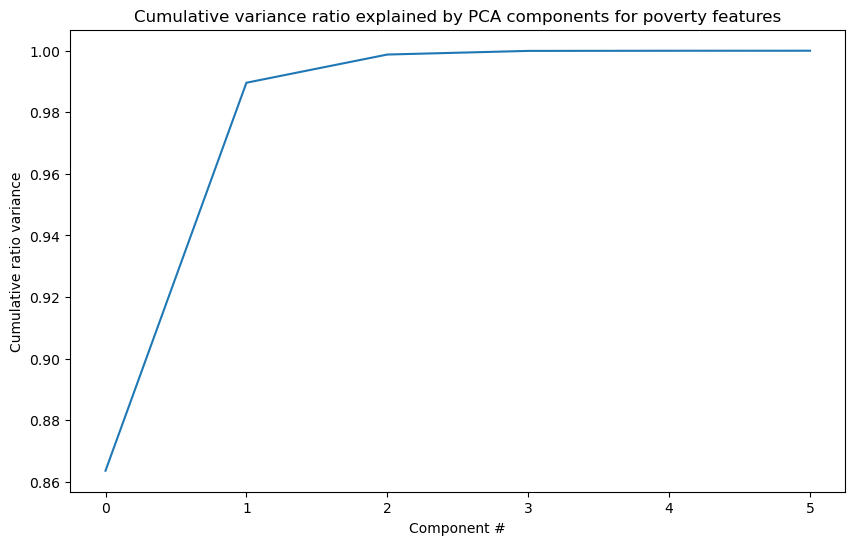

In [9]:
plt.subplots(figsize=(10, 6))
plt.plot(poverty_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for poverty features');

In [10]:
pd.DataFrame(poverty_pca.components_, columns=poverty_train.columns)

,Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population),Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),Poverty gap at $2.15 a day (2017 PPP) (%),Poverty gap at $3.65 a day (2017 PPP) (%),Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty gap at $6.85 a day (2017 PPP) (%)
0,0.425795,0.385503,0.362707,0.435403,0.414006,0.421370
1,-0.242384,-0.524081,0.635218,0.128952,0.375583,-0.324647
2,0.528791,-0.632154,-0.461202,0.299668,0.135098,-0.001390
3,0.325572,-0.216220,0.475312,0.048438,-0.769179,0.165369
4,0.119726,-0.267458,0.099841,-0.735708,0.258238,0.544252
5,-0.599998,-0.242534,-0.127842,0.400477,-0.104701,0.627289


As expected, the co-efficients for the first 2 principal components are similar to those of the PCA trained on the entire dataset. This is a good sign that there isn't a big difference between the distributions of the poverty features in the training and testing set.

In [11]:
poverty_pca_train = poverty_pca.transform(scale(poverty_train))

poverty_pca_test = poverty_pca.transform(scale(poverty_test))

Now I'm going to look at the distributions of the rest of the features to decide which ones should be normalized or scaled

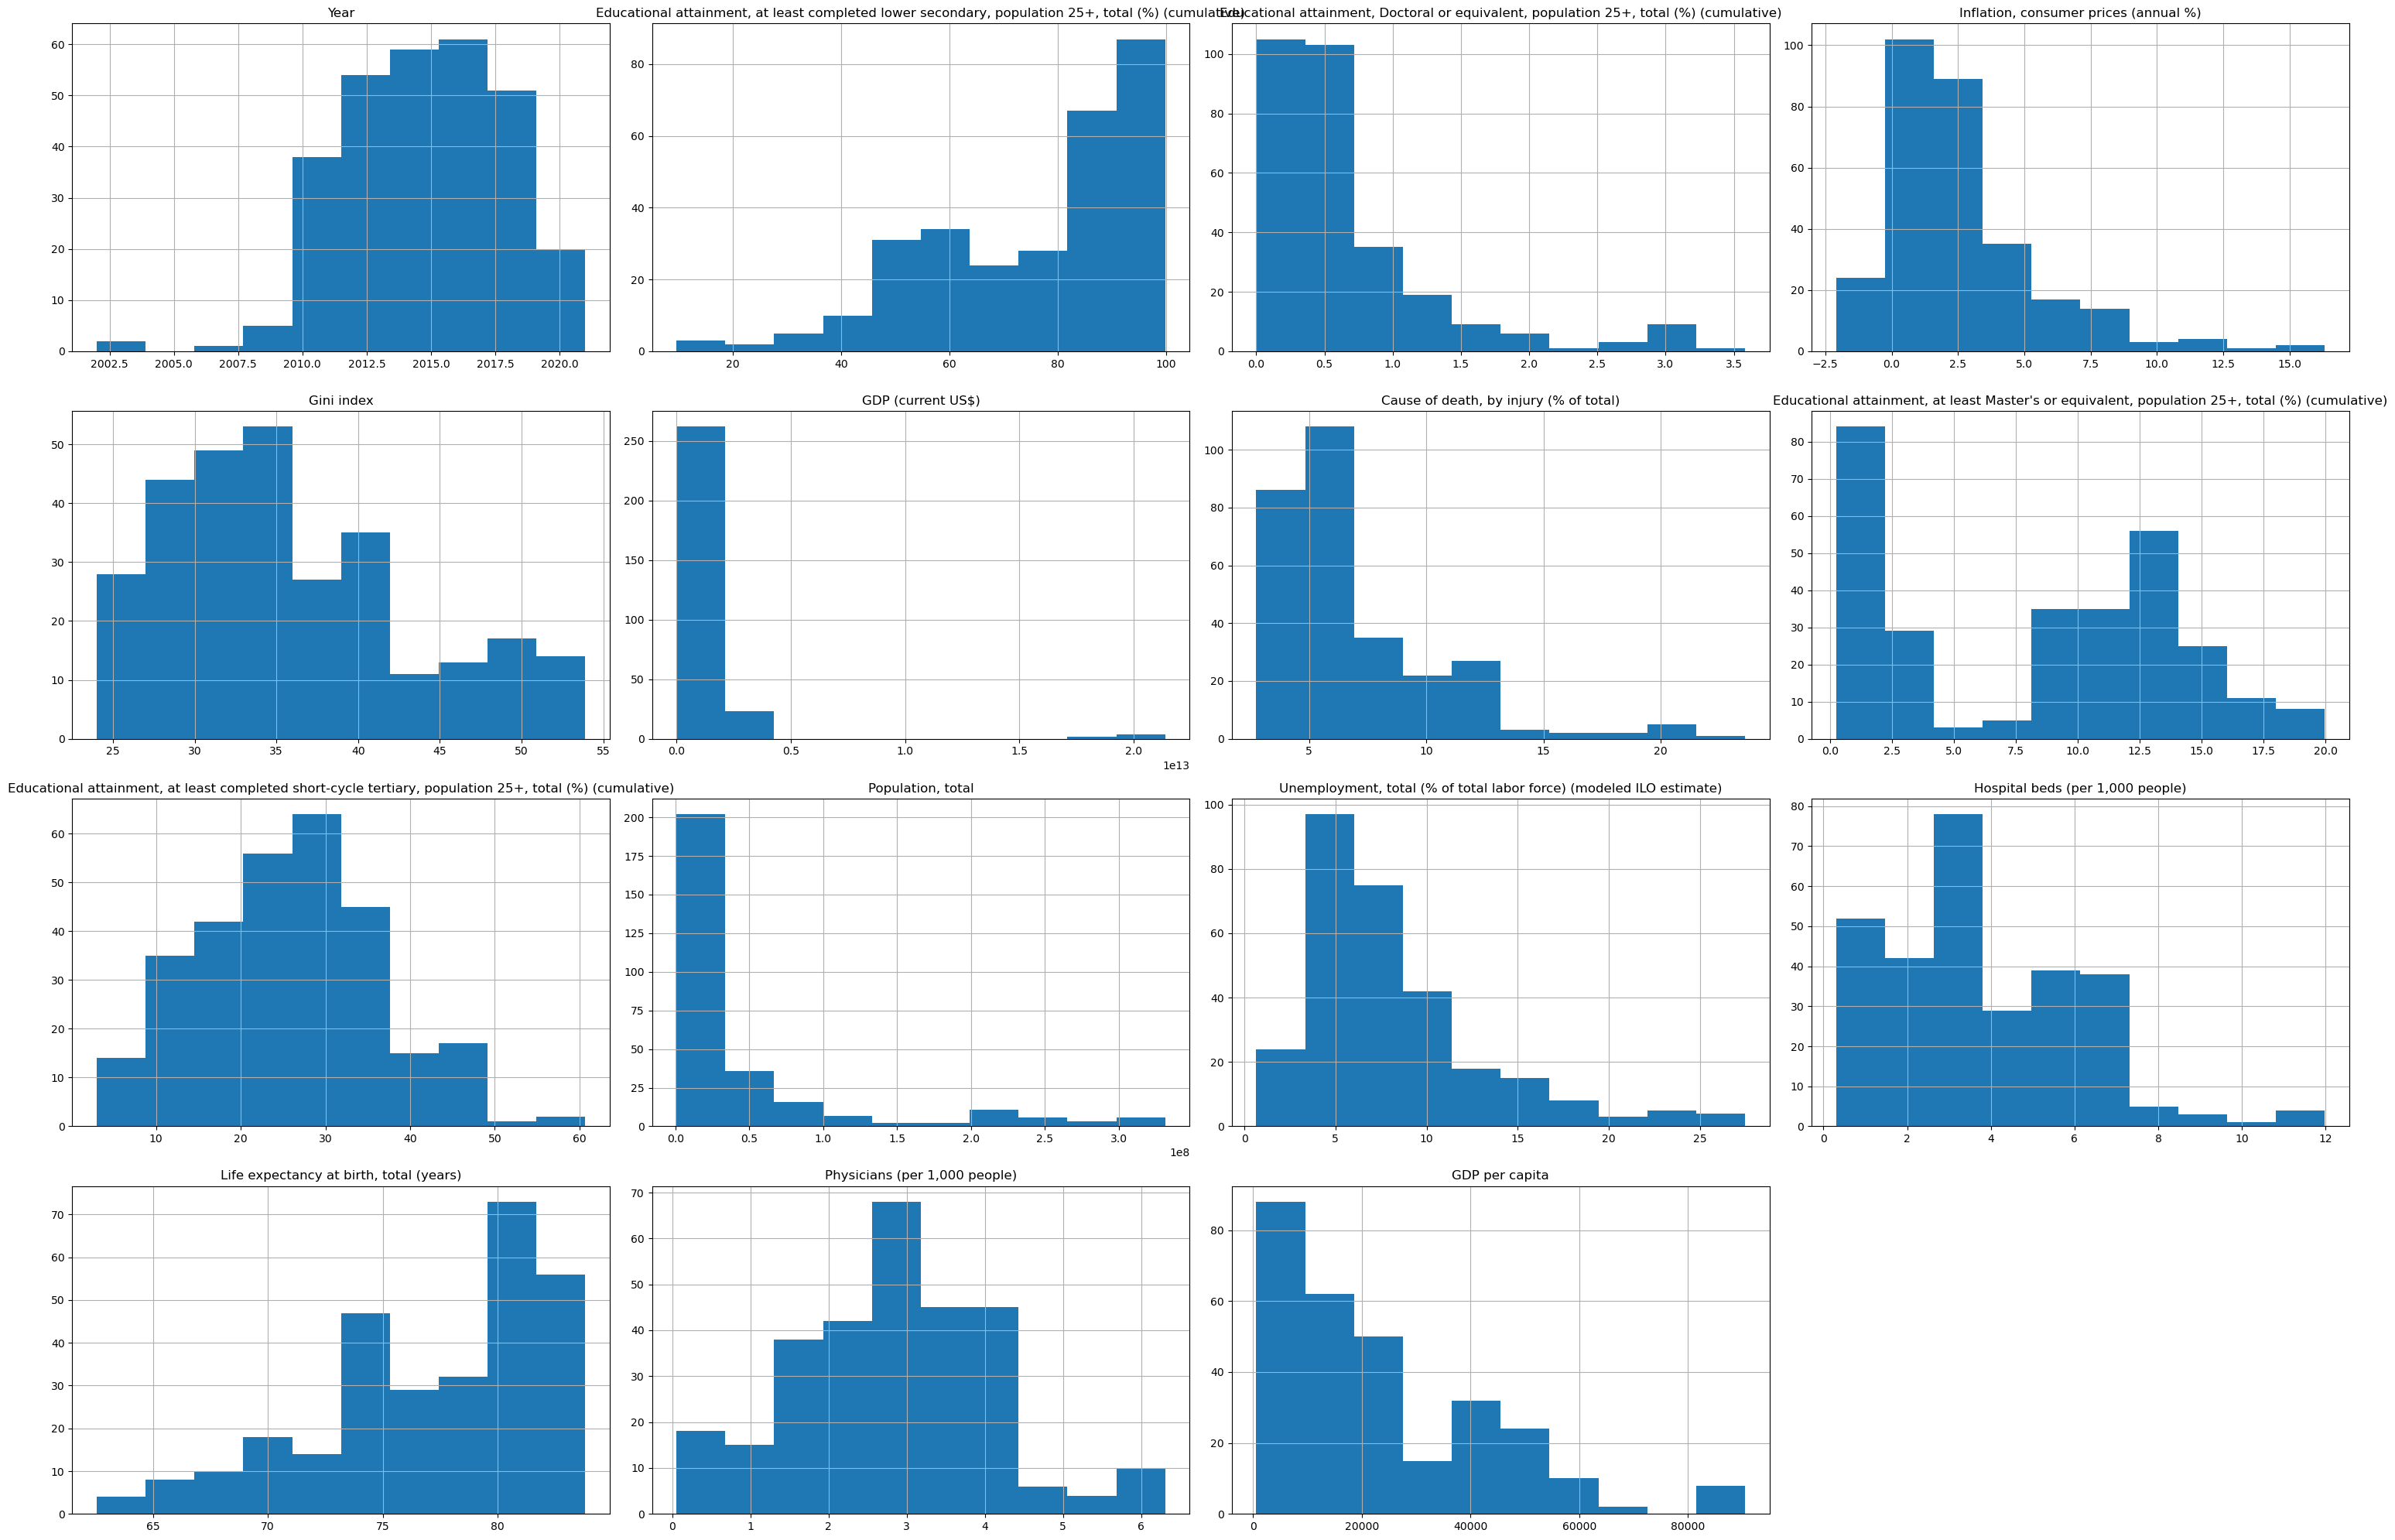

In [17]:
df[is_train].hist(figsize=(30,20))
plt.tight_layout();

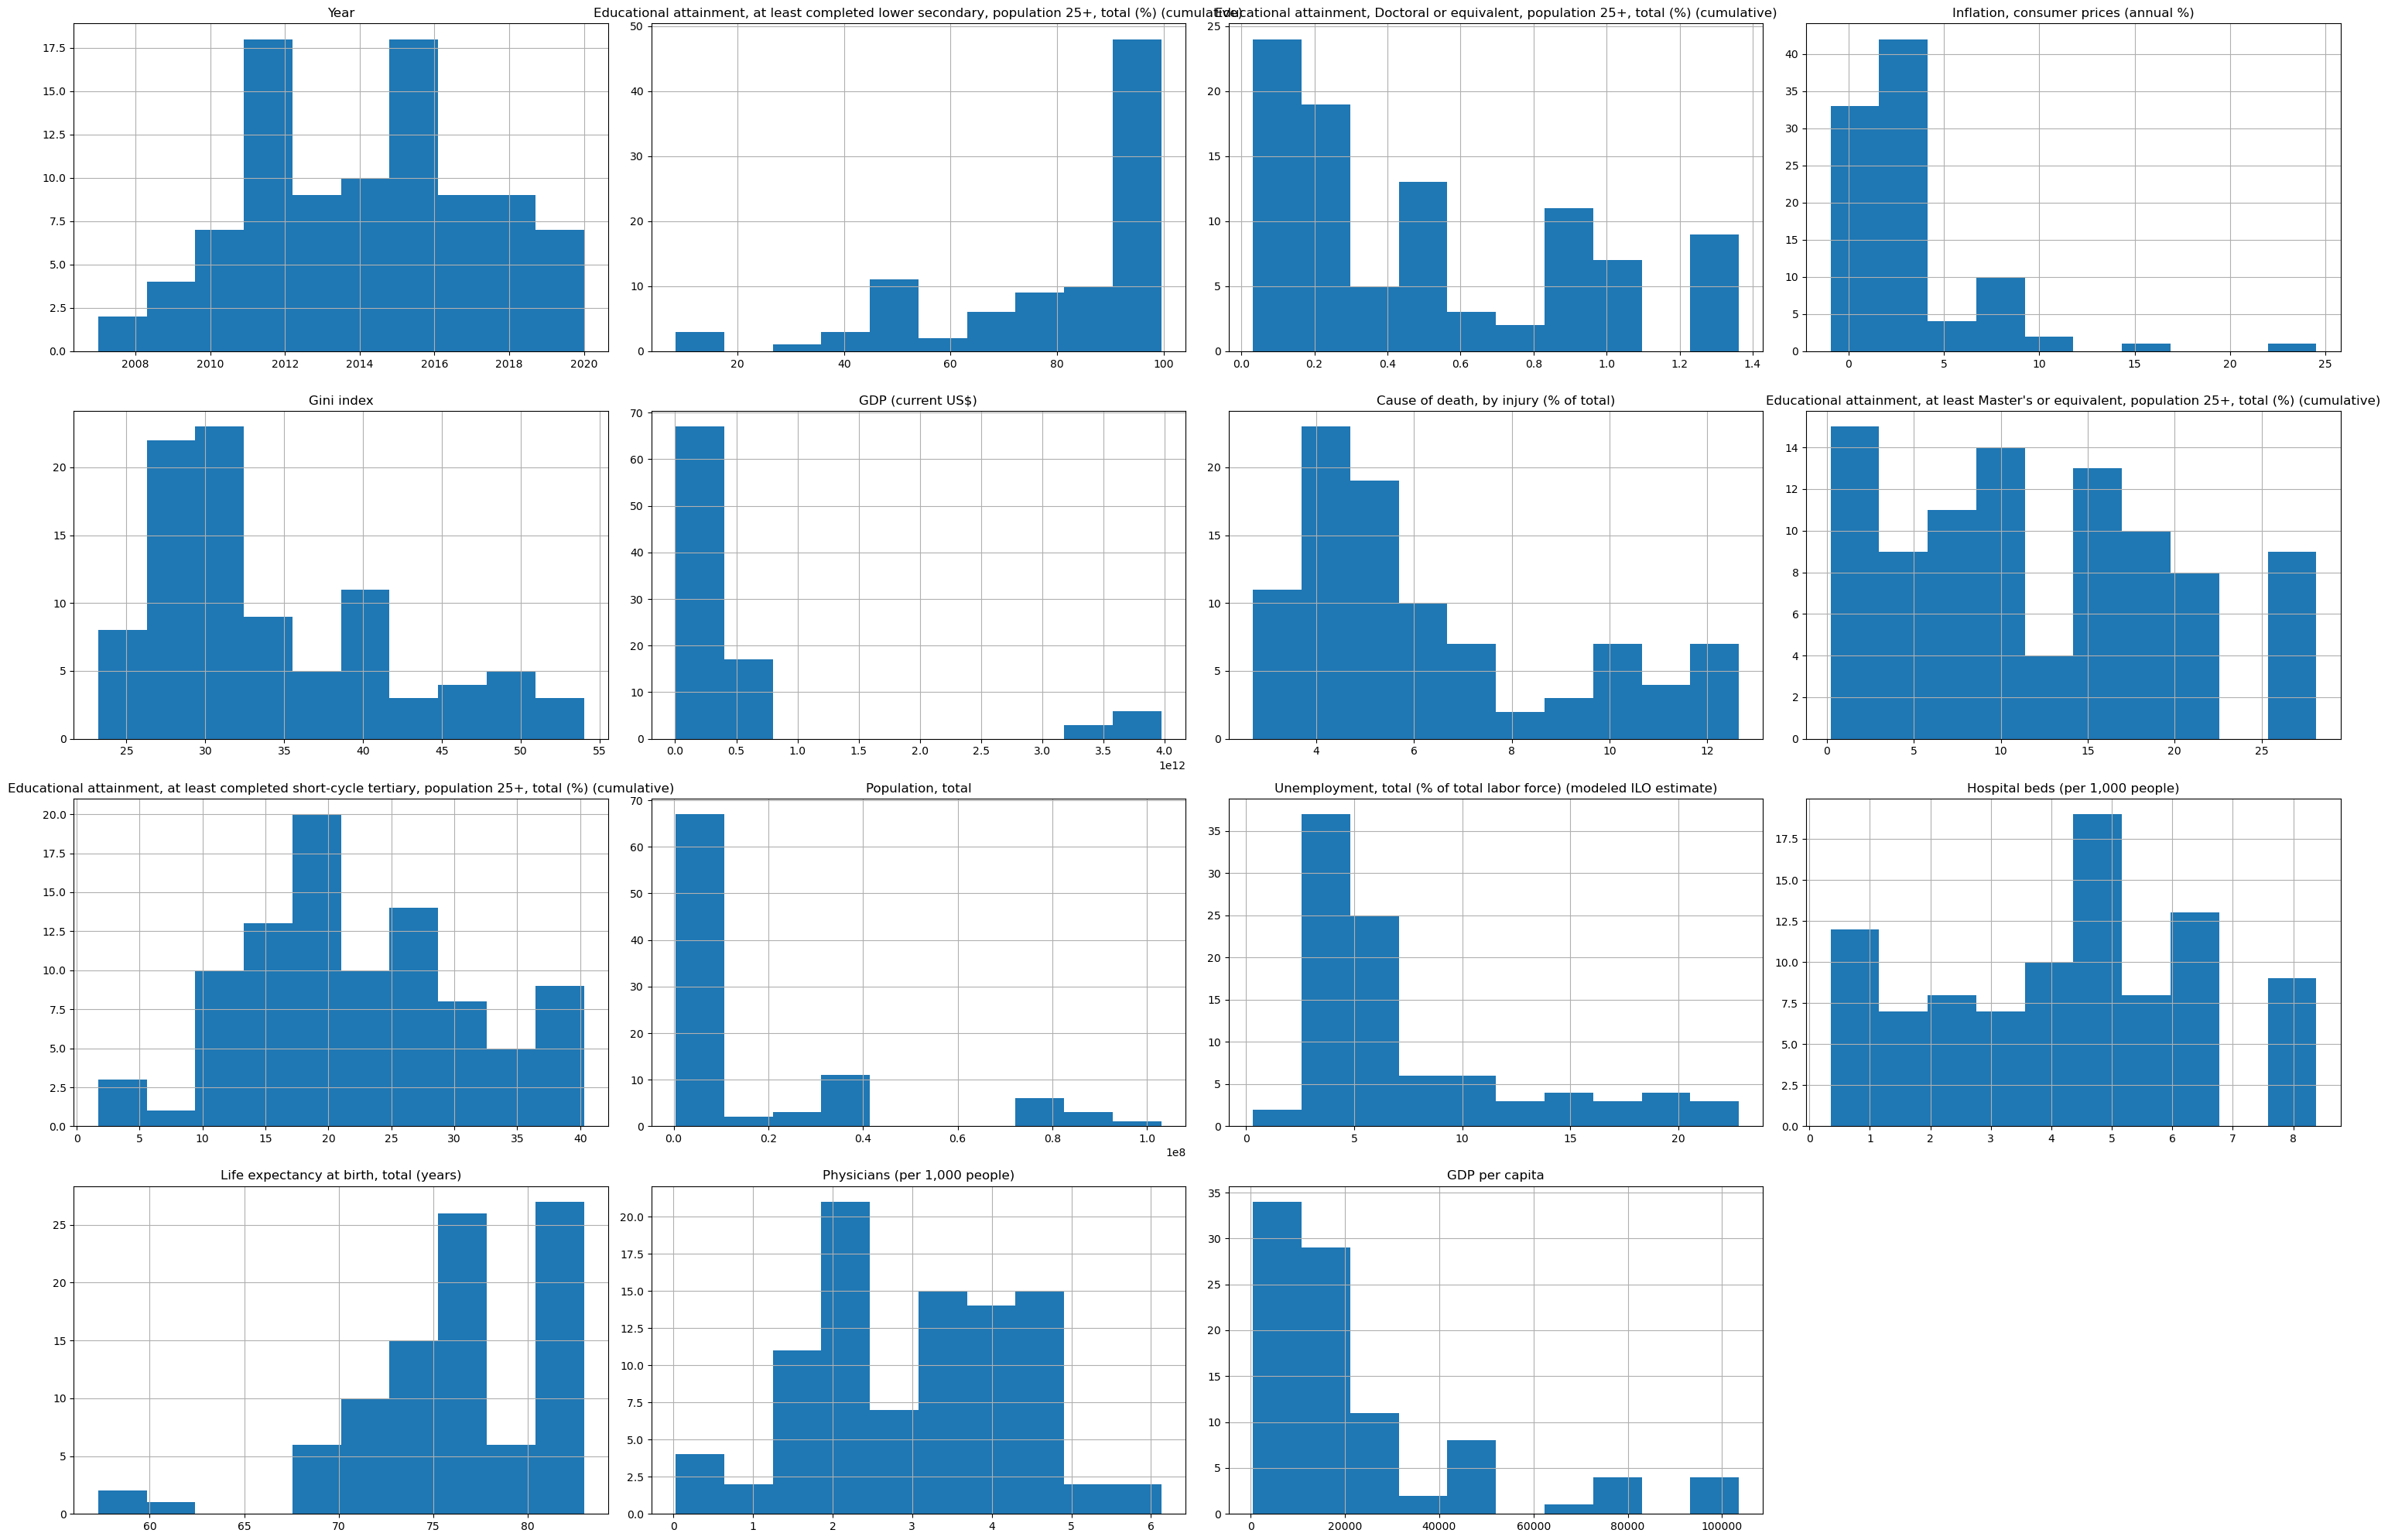

In [16]:
df[is_test].hist(figsize=(30,20))
plt.tight_layout();

In [ ]:
#percentages/proportions : all education features, Cause of Death by injury, Unemployment
#Standard scaled : GDP, Physicians per 1000,
# Year : Year
# 8/14

Although some of the distributions between the test and training sets are different, The distributions for Gini Index are similar. 